#Análise de Pacientes com Coronavírus 🦠

### Etapa 01: Importação do Conjunto de Dados

In [1]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importando o conjunto de dados dos pacientes
url = '/content/covid_data.csv'
dados = pd.read_csv(url)

In [3]:
# Verificando se a leitura foi feita com sucesso
dados.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


###Etapa 02: Exploração do Conjunto de Dados

In [4]:
# Obtendo as informações gerais do dataframe
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [5]:
# Descobrindo a quantidade de valores nulos (NaN)
dados.isnull().sum()

,0
USMER,0
MEDICAL_UNIT,0
SEX,0
PATIENT_TYPE,0
DATE_DIED,0
INTUBED,0
PNEUMONIA,0
AGE,0
PREGNANT,0
DIABETES,0


In [6]:
# Verificando os valores da única coluna do tipo 'object'
dados['DATE_DIED'].unique()

array(['03/05/2020', '03/06/2020', '09/06/2020', '12/06/2020',
       '21/06/2020', '9999-99-99', '26/02/2020', '05/04/2020',
       '08/05/2020', '20/05/2020', '17/07/2020', '13/01/2020',
       '22/01/2020', '29/01/2020', '13/02/2020', '18/02/2020',
       '19/02/2020', '20/02/2020', '24/02/2020', '04/03/2020',
       '07/03/2020', '12/03/2020', '14/03/2020', '18/03/2020',
       '27/03/2020', '28/03/2020', '29/03/2020', '02/04/2020',
       '06/04/2020', '07/04/2020', '08/04/2020', '09/04/2020',
       '10/04/2020', '11/04/2020', '12/04/2020', '13/04/2020',
       '14/04/2020', '15/04/2020', '16/04/2020', '17/04/2020',
       '18/04/2020', '20/04/2020', '21/04/2020', '22/04/2020',
       '23/04/2020', '24/04/2020', '25/04/2020', '26/04/2020',
       '27/04/2020', '28/04/2020', '29/04/2020', '30/04/2020',
       '01/05/2020', '02/05/2020', '04/05/2020', '05/05/2020',
       '06/05/2020', '07/05/2020', '09/05/2020', '10/05/2020',
       '11/05/2020', '12/05/2020', '13/05/2020', '14/05

###Etapa 03: Manipulação do Conjunto de Dados

In [7]:
# Substituindo os valores de 97 e 99 por valores nulos (NaN)
valores_trocar = [97, 98, 99]
dados.replace(valores_trocar, np.nan, inplace=True)

In [8]:
# Verificando a alteração
dados['INTUBED']

,INTUBED
0,NaN
1,NaN
2,1.0
3,NaN
4,NaN
...,...
1048570,NaN
1048571,2.0
1048572,NaN
1048573,NaN


In [9]:
# Obtendo os valores da coluna de gravidez
dados['PREGNANT'].unique()

array([ 2., nan,  1.])

In [10]:
# Substituindo os valores nulos (NaN) da coluna de gravidez por dois
dados['PREGNANT'].replace(np.nan, 2, inplace=True)
dados['PREGNANT'].unique()

<ipython-input-10-44b7f8094421>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados['PREGNANT'].replace(np.nan, 2, inplace=True)


array([2., 1.])

In [11]:
# Removendo os registros com valores nulos (NaN)
dados.dropna(inplace=True)

In [12]:
# Obtendo os valores da coluna de gênero
dados['SEX'].unique()

array([2, 1])

In [13]:
# Trocando os valores da coluna de gênero para melhor legibilidade
dados['SEX'] = dados['SEX'].apply(lambda x: 'Female' if x == 1 else 'Man')
dados['SEX'].unique()

array(['Man', 'Female'], dtype=object)

In [14]:
# Removendo a coluna de estado do paciente
dados.drop(columns=['PATIENT_TYPE'], inplace=True)
dados.head()
# Motivo: a coluna possui um único valor

,USMER,MEDICAL_UNIT,SEX,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
2,2,1,Man,09/06/2020,1.0,2.0,55.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
5,2,1,Female,9999-99-99,2.0,1.0,40.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
8,2,1,Female,9999-99-99,2.0,2.0,37.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3,2.0
9,2,1,Female,9999-99-99,2.0,2.0,25.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
11,2,1,Man,9999-99-99,2.0,2.0,24.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0


In [15]:
# Obtendo os valores únicos da coluna de classificação
dados['CLASIFFICATION_FINAL'].unique()

array([3, 7, 6, 5, 1, 2, 4])

In [16]:
# Obtendo os registros (índices) com valores acima de três (inconclusivos)
filtro = dados['CLASIFFICATION_FINAL'] > 3
registros = dados[filtro].sort_values('CLASIFFICATION_FINAL', ascending=True).index
registros

Index([ 660017,  660309,  660303,  660288,  660282,  660269,  660268,  660265,
        660261,  660254,
       ...
        304298,  304299,  304303,  304315,  304322,  304323,  304329,  304337,
        304231, 1048571],
      dtype='int64', length=81214)

In [17]:
# Removendo os registros sem conclusão
dados.drop(registros, inplace=True)
dados.head()

,USMER,MEDICAL_UNIT,SEX,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
2,2,1,Man,09/06/2020,1.0,2.0,55.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
5,2,1,Female,9999-99-99,2.0,1.0,40.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
8,2,1,Female,9999-99-99,2.0,2.0,37.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3,2.0
9,2,1,Female,9999-99-99,2.0,2.0,25.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
11,2,1,Man,9999-99-99,2.0,2.0,24.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0


In [18]:
# Verificando se o processo foi feito com sucesso
dados.sort_values('CLASIFFICATION_FINAL', ascending=True)

,USMER,MEDICAL_UNIT,SEX,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
341768,2,6,Man,01/05/2020,1.0,1.0,50.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1,2.0
472094,2,12,Female,9999-99-99,2.0,1.0,72.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1,2.0
472100,1,12,Man,9999-99-99,2.0,1.0,48.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1,2.0
472106,2,12,Man,9999-99-99,2.0,1.0,58.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1,2.0
472107,2,12,Man,9999-99-99,2.0,1.0,31.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94146,2,4,Man,9999-99-99,2.0,1.0,60.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
94127,1,4,Female,9999-99-99,2.0,2.0,44.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
94124,1,4,Female,9999-99-99,2.0,2.0,77.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
94527,2,4,Female,9999-99-99,2.0,1.0,55.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3,2.0


In [19]:
# Alterando os valores da coluna de data da morte
dados['DATE_DIED'] = dados['DATE_DIED'].replace('9999-99-99', 'Not died')
dados.head()

,USMER,MEDICAL_UNIT,SEX,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
2,2,1,Man,09/06/2020,1.0,2.0,55.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
5,2,1,Female,Not died,2.0,1.0,40.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
8,2,1,Female,Not died,2.0,2.0,37.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3,2.0
9,2,1,Female,Not died,2.0,2.0,25.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
11,2,1,Man,Not died,2.0,2.0,24.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0


In [20]:
# Filtrando as colunas que possuem os valores de um e dois apenas
valores_booleanos = [1, 2]
colunas_booleanas = dados.columns[dados.apply(lambda coluna: coluna.isin(valores_booleanos).all())]
colunas_booleanas

Index(['USMER', 'INTUBED', 'PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD',
       'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR',
       'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'ICU'],
      dtype='object')

In [21]:
# Trocando os valores de um e dois para True e False
for coluna in colunas_booleanas:
  dados[coluna] = dados[coluna].apply(lambda num: True if num == 1 else False)

In [22]:
# Verificando se o processo foi bem executado
dados.head()

,USMER,MEDICAL_UNIT,SEX,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
2,False,1,Man,09/06/2020,True,False,55.0,False,True,False,False,False,False,False,False,False,False,False,3,False
5,False,1,Female,Not died,False,True,40.0,False,False,False,False,False,False,False,False,False,False,False,3,False
8,False,1,Female,Not died,False,False,37.0,False,True,False,False,False,True,False,False,True,False,False,3,False
9,False,1,Female,Not died,False,False,25.0,False,False,False,False,False,False,False,False,False,False,False,3,False
11,False,1,Man,Not died,False,False,24.0,False,False,False,False,False,False,False,False,False,False,False,3,False


###Etapa 04: Análises do Conjunto de Dados

#####Análise 01: Quantidade Pacientes por Gênero

In [23]:
# Descobrindo a quantidade de pacientes por gênero
dados['SEX'].value_counts()

,count
SEX,
Man,66796
Female,41407


In [24]:
# Exibindo em porcentagem
dados['SEX'].value_counts(normalize=True)

,proportion
SEX,
Man,0.617321
Female,0.382679


#####Análise 02: Taxa de Mortalidade

In [25]:
# Descobrindo a quantidade de pacientes que morreram
nao_morreu = 'Not died'
taxa_mortalidade = dados.query('@nao_morreu != DATE_DIED')['SEX'].value_counts()
taxa_mortalidade

,count
SEX,
Man,30538
Female,16613


In [26]:
# Atribuindo os valores para variáveis
homens_morreram = taxa_mortalidade.iloc[0]
mulheres_morreram = taxa_mortalidade.iloc[1]

In [27]:
# Descobrindo a quantidade de pacientes que não morreram
nao_morreu = 'Not died'
taxa_vivos = dados.query('@nao_morreu == DATE_DIED')['SEX'].value_counts()
taxa_vivos

,count
SEX,
Man,36258
Female,24794


In [28]:
# Atribuindo os valores para variáveis
homens_nao_morreram = taxa_vivos.iloc[0]
mulheres_nao_morreram = taxa_vivos.iloc[1]

In [29]:
# Realizando o cálculo para descobrir a taxa de mortalidade (homens)
taxa_homens = homens_morreram / (homens_nao_morreram + homens_morreram) * 100
taxa_homens

45.71830648541829

In [30]:
# Realizando o cálculo para descobrir a taxa de mortalidade (mulheres)
taxa_mulheres = mulheres_morreram / (mulheres_nao_morreram + mulheres_morreram) * 100
taxa_mulheres

40.12123553988456

#####Análise 03: Distribuição de Idade

(array([6.220e+02, 6.800e+01, 5.300e+01, 5.500e+01, 4.500e+01, 3.800e+01,
        3.900e+01, 4.300e+01, 3.400e+01, 3.800e+01, 5.200e+01, 4.000e+01,
        6.200e+01, 6.100e+01, 5.700e+01, 6.900e+01, 1.040e+02, 9.400e+01,
        1.110e+02, 1.670e+02, 4.670e+02, 2.510e+02, 3.310e+02, 4.350e+02,
        5.310e+02, 5.840e+02, 6.020e+02, 6.870e+02, 8.650e+02, 8.560e+02,
        8.920e+02, 9.710e+02, 1.072e+03, 1.125e+03, 1.134e+03, 1.239e+03,
        1.296e+03, 1.380e+03, 1.519e+03, 1.546e+03, 3.408e+03, 1.904e+03,
        2.110e+03, 2.222e+03, 2.229e+03, 2.332e+03, 2.343e+03, 2.458e+03,
        2.469e+03, 2.690e+03, 2.520e+03, 2.513e+03, 2.611e+03, 2.875e+03,
        2.728e+03, 2.597e+03, 2.696e+03, 2.709e+03, 2.668e+03, 2.443e+03,
        4.874e+03, 2.418e+03, 2.388e+03, 2.192e+03, 2.190e+03, 2.050e+03,
        2.046e+03, 1.819e+03, 1.782e+03, 1.640e+03, 1.488e+03, 1.477e+03,
        1.335e+03, 1.251e+03, 1.258e+03, 9.930e+02, 1.044e+03, 8.380e+02,
        7.850e+02, 7.130e+02, 1.205e+0

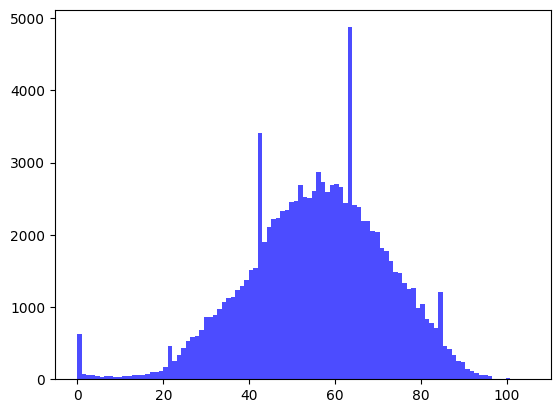

In [31]:
# Criando um histograma (gráfico)
plt.hist(dados['AGE'], bins=100, color='Blue', alpha=0.7)

In [32]:
# Verificando a quantidade de pacientes por idade
dados['AGE'].value_counts()

,count
AGE,
56.0,2875
57.0,2728
60.0,2709
59.0,2696
52.0,2690
...,...
9.0,34
100.0,17
101.0,5


#####Análise 05: Estatística com base em Idade

In [33]:
# Obtendo um dataframe com apenas as idades e níveis de enfermidade
colunas = ['AGE', 'CLASIFFICATION_FINAL']
pacientes_idade = dados[colunas]

In [34]:
# Calculando a mediana de idade para cada nível de enfermidade grave
mediana = pacientes_idade.groupby('CLASIFFICATION_FINAL')['AGE'].median()
mediana

,AGE
CLASIFFICATION_FINAL,
1,56.0
2,63.0
3,56.0


<BarContainer object of 3 artists>

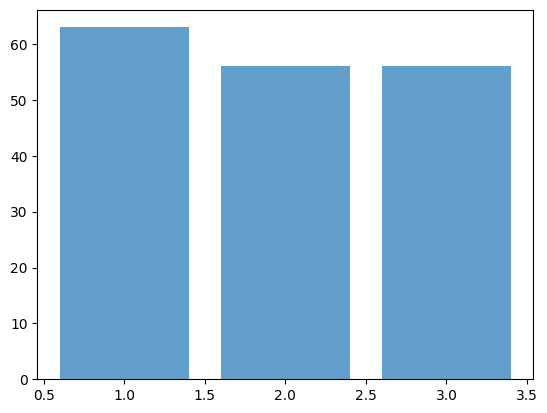

In [35]:
# Exibindo graficamente
plt.bar(pacientes_idade['CLASIFFICATION_FINAL'].unique(), mediana, alpha=0.7)

In [36]:
# Montando um filtro de registros dos pacientes internados
internados = dados['ICU']
dados[internados]['ICU'].unique()

array([ True])

In [37]:
# Calculando a mediana de idade dos internados
dados[internados]['AGE'].median()

57.0

In [38]:
# Montando um filtro de registros de pacientes intubados
intubados = dados['INTUBED']
dados[intubados]['INTUBED'].unique()

array([ True])

In [39]:
# Calculando a mediana de idade dos intubados
dados[intubados]['AGE'].median()

60.0

#####Análise 06: Impacto da Obesidade nos Pacientes

In [40]:
# Descobrindo a porcentagem de pacientes que morreram
quantidade_pacientes_morreram = homens_morreram + mulheres_morreram
quantidade_pacientes_morreram

47151

In [41]:
# Descobrindo a porcentagem de pacientes que não morreram
quantidade_pacientes_nao_morreram = homens_nao_morreram + mulheres_nao_morreram
quantidade_pacientes_nao_morreram

61052

In [42]:
# Analisando a taxa de mortabilidade por paciente
mortalidade = quantidade_pacientes_morreram / (quantidade_pacientes_morreram + quantidade_pacientes_nao_morreram)
mortalidade

0.4357642579226084

In [43]:
# Obtendo um dataframe de pacientes obesos
obesidade = dados['OBESITY']
obesos = dados[obesidade]
obesos.head()

,USMER,MEDICAL_UNIT,SEX,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
8,False,1,Female,Not died,False,False,37.0,False,True,False,False,False,True,False,False,True,False,False,3,False
336,True,3,Man,28/03/2020,False,True,47.0,False,False,True,False,False,True,False,False,True,False,False,3,False
341,True,3,Man,07/04/2020,True,True,61.0,False,False,False,False,False,True,False,False,True,False,False,3,True
344,True,3,Man,09/04/2020,False,True,88.0,False,True,True,False,False,True,False,False,True,True,False,3,False
346,False,3,Man,10/04/2020,True,True,42.0,False,True,False,False,False,True,False,False,True,False,False,3,False


In [44]:
# Definindo a quantidade de pacientes que são obesos
quantidade_obesos = obesos.shape[0]
quantidade_obesos

25081

In [45]:
# Definindo a quantidade de pacientes que são obesos e que faleceram
falecidos = dados['DATE_DIED'] != 'Not died'
quantidade_obesos_falecidos = obesos[falecidos].shape[0]
quantidade_obesos_falecidos

<ipython-input-45-08612bc7746c>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  quantidade_obesos_falecidos = obesos[falecidos].shape[0]


11466

In [46]:
# Calculando a porcentagem de pacientes obesos que faleceram
porcentagem_obesos_falecidos = quantidade_obesos_falecidos / quantidade_obesos
porcentagem_obesos_falecidos

0.4571588054702763

In [47]:
# Agrupando o dataframe original por classificação final
estado_final_pacientes = dados.groupby('CLASIFFICATION_FINAL').size().to_frame('COUNT')
estado_final_pacientes['PERCENTAGE'] = estado_final_pacientes['COUNT'] / (estado_final_pacientes['COUNT'].sum()) * 100
estado_final_pacientes

,COUNT,PERCENTAGE
CLASIFFICATION_FINAL,,
1,2068,1.911222
2,1630,1.506428
3,104505,96.582350


In [48]:
# Agrupando o dataframe de obesos por classificação final
estado_final_obesos = obesos.groupby('CLASIFFICATION_FINAL').size().to_frame('COUNT')
estado_final_obesos['PERCENTAGE'] = (estado_final_obesos['COUNT']) / (estado_final_obesos['COUNT'].sum()) * 100
estado_final_obesos

,COUNT,PERCENTAGE
CLASIFFICATION_FINAL,,
1,334,1.331685
2,314,1.251944
3,24433,97.416371


#####Análise 07: Impacto do Tabaco nos Pacientes

In [49]:
# Criando um dataframe de pacientes fumantes
fumantes = dados[dados['TOBACCO']]
fumantes

,USMER,MEDICAL_UNIT,SEX,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
20,False,1,Man,Not died,False,True,59.0,False,True,False,False,False,False,False,False,False,False,True,3,True
337,False,3,Man,29/03/2020,False,True,43.0,False,False,False,False,False,False,False,False,False,False,True,3,False
338,False,3,Man,02/04/2020,False,True,86.0,False,False,True,False,False,False,False,False,False,False,True,3,False
352,False,3,Man,11/04/2020,False,True,74.0,False,True,False,False,False,True,False,False,False,False,True,3,False
357,False,3,Man,12/04/2020,True,True,53.0,False,False,False,False,False,True,False,False,False,False,True,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047633,True,13,Man,12/07/2020,False,True,57.0,False,True,False,False,False,True,False,False,True,False,True,3,False
1047648,True,13,Female,Not died,False,True,46.0,False,True,False,False,False,True,False,False,True,False,True,1,False
1047685,True,13,Man,Not died,False,False,40.0,False,False,False,False,False,False,False,False,False,False,True,3,False
1047779,True,13,Man,Not died,False,False,73.0,False,True,False,False,False,False,False,True,False,False,True,3,False


In [50]:
# Obtendo a quantidade de pacientes fumantes
quantidade_fumantes = fumantes.shape[0]
quantidade_fumantes

8444

In [51]:
# Obtendo apenas os pacientes fumantes que morreram
filtro = fumantes['DATE_DIED'] != 'Not died'
fumantes_morreram = fumantes[filtro]
fumantes_morreram.head()

,USMER,MEDICAL_UNIT,SEX,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
337,False,3,Man,29/03/2020,False,True,43.0,False,False,False,False,False,False,False,False,False,False,True,3,False
338,False,3,Man,02/04/2020,False,True,86.0,False,False,True,False,False,False,False,False,False,False,True,3,False
352,False,3,Man,11/04/2020,False,True,74.0,False,True,False,False,False,True,False,False,False,False,True,3,False
357,False,3,Man,12/04/2020,True,True,53.0,False,False,False,False,False,True,False,False,False,False,True,3,False
361,False,3,Man,13/04/2020,True,True,57.0,False,False,False,False,False,False,False,False,True,False,True,3,False


In [52]:
# Definindo a quantidade de fumante que morreram
quantidade_fumantes_morreram = fumantes_morreram.shape[0]
quantidade_fumantes_morreram

3881

In [53]:
# Obtendo a taxa de mortalidade de fumantes
mortalidade_fumantes = quantidade_fumantes_morreram / quantidade_fumantes
mortalidade_fumantes

0.45961629559450495

#####Análise 08: Impacto da Asma nos Pacientes

In [72]:
# Criando um dataframe unicamente com pacientes com asma
filtro = dados['ASTHMA']
asmaticos = dados[filtro]
asmaticos.head()

,USMER,MEDICAL_UNIT,SEX,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
519,True,3,Female,13/05/2020,True,True,60.0,False,False,False,True,False,True,False,False,False,False,False,3,True
787,True,3,Female,02/06/2020,False,True,61.0,False,False,False,True,False,True,False,False,True,False,False,3,True
993,False,3,Female,14/06/2020,True,True,60.0,False,True,False,True,False,True,False,False,True,False,False,3,False
1159,False,3,Man,22/06/2020,False,True,47.0,False,False,False,True,False,True,False,False,True,False,False,3,False
1162,True,3,Female,22/06/2020,False,True,79.0,False,True,False,True,False,True,False,False,True,False,False,3,False


(array([ 1.,  1.,  1.,  1.,  2.,  2.,  0.,  4.,  2.,  2.,  0.,  2.,  2.,
         1.,  1.,  4.,  0.,  4.,  5.,  5.,  7.,  8., 11., 12., 14., 21.,
        27., 24., 17., 28., 24., 25., 25.,  0., 42., 33., 24., 24., 29.,
        34., 50., 36., 43., 46., 43., 55., 61., 53., 61.,  0., 79., 56.,
        63., 43., 60., 57., 51., 60., 58., 55., 49., 59., 58., 53., 43.,
        51.,  0., 52., 39., 48., 47., 33., 40., 31., 39., 30., 23., 26.,
        22., 26., 22., 15., 17.,  0., 14., 22., 14.,  5., 10.,  8.,  2.,
         4.,  5.,  4.,  1.,  0.,  1.,  2.,  2.,  1.]),
 array([ 2.  ,  2.94,  3.88,  4.82,  5.76,  6.7 ,  7.64,  8.58,  9.52,
        10.46, 11.4 , 12.34, 13.28, 14.22, 15.16, 16.1 , 17.04, 17.98,
        18.92, 19.86, 20.8 , 21.74, 22.68, 23.62, 24.56, 25.5 , 26.44,
        27.38, 28.32, 29.26, 30.2 , 31.14, 32.08, 33.02, 33.96, 34.9 ,
        35.84, 36.78, 37.72, 38.66, 39.6 , 40.54, 41.48, 42.42, 43.36,
        44.3 , 45.24, 46.18, 47.12, 48.06, 49.  , 49.94, 50.88, 51.82,
        

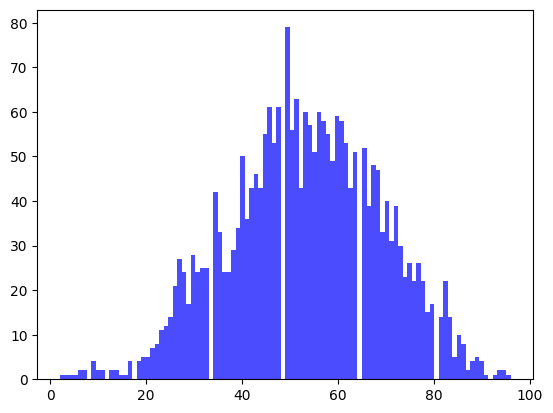

In [59]:
# Observando a faixa etária predominante de pacientes asmáticos
plt.hist(asmaticos['AGE'], bins=100, color='Blue', alpha=0.7)

In [61]:
# Obtendo a mediana de idade dos pacientes asmáticos
mediana_idade = asmaticos['AGE'].median()
mediana_idade

53.0

In [63]:
# Calculando a taxa de mortalidade de pacientes asmáticos mais jovens
# Abaixo da mediana de idade
asmaticos_abaixo_mediana = asmaticos.query('@mediana_idade > AGE')
asmaticos_abaixo_mediana.head()

,USMER,MEDICAL_UNIT,SEX,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1159,False,3,Man,22/06/2020,False,True,47.0,False,False,False,True,False,True,False,False,True,False,False,3,False
1273,True,3,Man,29/06/2020,True,True,46.0,False,False,False,True,False,False,False,False,False,False,False,3,True
1460,True,3,Man,08/07/2020,True,True,50.0,False,True,False,True,False,True,False,True,True,False,False,3,False
1923,False,3,Female,Not died,False,False,39.0,False,False,False,True,False,False,False,False,True,False,False,3,False
1934,True,3,Man,Not died,False,False,47.0,False,False,False,True,False,True,True,False,True,False,False,3,False


In [69]:
# Calculando a quantidade desses pacientes que morreram
morreu = asmaticos['DATE_DIED'] != 'Not died'
asmaticos_morreram_abaixo_mediana = asmaticos_abaixo_mediana[morreu].shape[0]
asmaticos_morreram_abaixo_mediana

<ipython-input-69-e32dbceb4ff2>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  asmaticos_morreram_abaixo_mediana = asmaticos_abaixo_mediana[morreu].shape[0]


300

In [67]:
# Calculando a quantidade desses pacientes que não morreram
nao_morreu = asmaticos['DATE_DIED'] == 'Not died'
asmaticos_nao_morreram = asmaticos_abaixo_mediana[nao_morreu].shape[0]
asmaticos_nao_morreram

<ipython-input-67-43f3032f832d>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  asmaticos_nao_morreram = asmaticos_abaixo_mediana[nao_morreu].shape[0]


858

In [70]:
# Exibindo a taxa de mortalidade para pacientes abaixo da mediana de idade
asmaticos_morreram_abaixo_mediana / asmaticos[filtro].shape[0]

<ipython-input-70-3bcac547b7c6>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  asmaticos_morreram_abaixo_mediana / asmaticos[filtro].shape[0]


0.12412081092263136

In [73]:
# Obtendo um dataframe de pacientes asmáticos acima de mediana de idade
asmaticos_acima_mediana = asmaticos.query('@mediana_idade < AGE')
asmaticos_acima_mediana.head()

,USMER,MEDICAL_UNIT,SEX,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
519,True,3,Female,13/05/2020,True,True,60.0,False,False,False,True,False,True,False,False,False,False,False,3,True
787,True,3,Female,02/06/2020,False,True,61.0,False,False,False,True,False,True,False,False,True,False,False,3,True
993,False,3,Female,14/06/2020,True,True,60.0,False,True,False,True,False,True,False,False,True,False,False,3,False
1162,True,3,Female,22/06/2020,False,True,79.0,False,True,False,True,False,True,False,False,True,False,False,3,False
1320,True,3,Female,01/07/2020,False,True,82.0,False,False,False,True,False,True,False,False,False,False,False,3,False


In [76]:
# Obtendo a quantidade de pacientes asmáticos que morreram e são mais velhos
filtro = asmaticos_acima_mediana['DATE_DIED'] != 'Not died'
asmaticos_morreram_acima_mediana = asmaticos_acima_mediana[filtro].shape[0]
asmaticos_morreram_acima_mediana

598

In [78]:
# Calculando a taxa de mortalidade desses pacientes
selecao = asmaticos['DATE_DIED'] == 'Not died'
asmaticos_morreram_acima_mediana / asmaticos[selecao].shape[0]

0.3991989319092123